In [1]:
using DataFrames
using SolverBenchmark
using SolverTools
using JLD2

In [2]:
res_path = "C:\\Users\\Geoffroy Leconte\\Documents\\cours\\TFE\\code\\StageOptim\\amdahl_benchmarks\\results"
# gurobi_path = "C:\\Users\\Geoffroy Leconte\\Documents\\cours\\TFE\\code\\results\\gurobi"
# cplex_path = "C:\\Users\\Geoffroy Leconte\\Documents\\cours\\TFE\\code\\results\\cplex"

"C:\\Users\\Geoffroy Leconte\\Documents\\cours\\TFE\\code\\StageOptim\\amdahl_benchmarks\\results"

In [37]:
# ρ_min, δ_min = 1e-5*T(sqrt(eps())), 1e0*T(sqrt(eps()))
# file_test = jldopen(string(res_path, "\\mehrotra_qp_test.jld2"), "r") 
# mehrotra_test = file_test["stats"];
# close(file_test)
# file_test2 = jldopen(string(res_path, "\\mehrotra_qp_test2.jld2"), "r") 
# mehrotra_test2 = file_test2["stats"];
# close(file_test2)

#gurobi
fgur1 = jldopen(string(res_path, "\\gurobi_scaling_qp.jld2"), "r") 
gurobi1 = fgur1["stats"];
close(fgur1)
fgur2 = jldopen(string(res_path, "\\gurobi_scaling_qp2.jld2"), "r") 
gurobi2 = fgur2["stats"];
close(fgur2)

# # same with init diag 1e-2
# file1 = jldopen(string(res_path, "\\mehrotra_qp1.jld2"), "r") 
# mehrotra1 = file1["stats"];
# close(file1)
# # same with init diag 1e-1, ρ0=1e5*sqrt(eps()), δ0=1e6*sqrt(eps)
# file2 = jldopen(string(res_path, "\\mehrotra_qp2.jld2"), "r") 
# mehrotra2 = file2["stats"];
# close(file2)
# # init diag 1e-0, ρ0=1e5*sqrt(eps()), δ0=1e8*sqrt(eps)
# file3 = jldopen(string(res_path, "\\mehrotra_qp3.jld2"), "r") 
# mehrotra3 = file3["stats"];
# close(file3)
# # init diag 1e-0/2, ρ0=1e5*sqrt(eps()), δ0=1e5*sqrt(eps)
# file4 = jldopen(string(res_path, "\\mehrotra_qp4.jld2"), "r") 
# mehrotra4 = file4["stats"];
# close(file4)
# # same 4 with ϵ_pdd=1e-6
# file4bis = jldopen(string(res_path, "\\mehrotra_qp4bis.jld2"), "r") 
# mehrotra4bis = file4bis["stats"];
# close(file4bis)
# # init diag 1e-0/2, ρ0=1e5*sqrt(eps()), δ0=1e5*sqrt(eps), s/x_m_lvar control
# file5 = jldopen(string(res_path, "\\mehrotra_qp5.jld2"), "r") 
# mehrotra5 = file5["stats"];
# close(file5)
# # init diag 1e-0/2, ρ0=1e5*sqrt(eps()), δ0=1e5*sqrt(eps), s/x_m_lvar control with ϵ_pdd=1e-6
# file5bis = jldopen(string(res_path, "\\mehrotra_qp5bis.jld2"), "r") 
# mehrotra5bis = file5bis["stats"];
# close(file5bis)
# # init diag 1e-0/2, ρ0=1e5*sqrt(eps()), δ0=1e5*sqrt(eps), diag_J control (-1 / min(δ,ρ) / 1e-1)
# file6 = jldopen(string(res_path, "\\mehrotra_qp6.jld2"), "r") 
# mehrotra6 = file6["stats"];
# close(file6)
# # init diag 1e-0/2, ρ0=1e5*sqrt(eps()), δ0=1e5*sqrt(eps),  diag_J control 1/min(ρ, δ)/1e-1 with ϵ_pdd=1e-6
# file6bis = jldopen(string(res_path, "\\mehrotra_qp6bis.jld2"), "r") 
# mehrotra6bis = file6bis["stats"];
# close(file6bis)
# # init diag 1e-0/2, ρ0=1e5*sqrt(eps()), δ0=1e5*sqrt(eps), diag_J control -1 / δ / 1e-8 
# file7 = jldopen(string(res_path, "\\mehrotra_qp7.jld2"), "r") 
# mehrotra7 = file7["stats"];
# close(file7)
# # init diag 1e-0/2, ρ0=1e5*sqrt(eps()), δ0=1e5*sqrt(eps), diag_J control -1 / δ / 1e-8 with ϵ_pdd=1e-6
# file7bis = jldopen(string(res_path, "\\mehrotra_qp7bis.jld2"), "r") 
# mehrotra7bis= file7bis["stats"];
# close(file7bis)
# # init diag 1e-0/2, ρ0=1e5*sqrt(eps()), δ0=1e5*sqrt(eps), diag_J control -1 / δ / 1e-6
# file8 = jldopen(string(res_path, "\\mehrotra_qp8.jld2"), "r") 
# mehrotra8 = file8["stats"];
# close(file8)
# file8bis = jldopen(string(res_path, "\\mehrotra_qp8bis.jld2"), "r") 
# mehrotra8bis = file8bis["stats"];
# close(file8bis)
# same with inf norm for rb and rc
file9 = jldopen(string(res_path, "\\mehrotra_qp9.jld2"), "r") 
mehrotra9 = file9["stats"];
close(file9)
# same with inf norm for rb and rc (rc and rb matching tulip)
file9t = jldopen(string(res_path, "\\mehrotra_qp9t.jld2"), "r") 
mehrotra9t = file9t["stats"];
close(file9t)
# same with inf norm for rb and rc with ϵ_pdd=1e-6
file9bis = jldopen(string(res_path, "\\mehrotra_qp9bis.jld2"), "r") 
mehrotra9bis = file9bis["stats"];
close(file9bis)
# same J_fact in init_pts
file10 = jldopen(string(res_path, "\\mehrotra_qp10.jld2"), "r") 
mehrotra10 = file10["stats"];
close(file10)
# same with d3.=1
file11 = jldopen(string(res_path, "\\mehrotra_qp11.jld2"), "r") 
mehrotra11 = file11["stats"];
close(file11)

# multi precision ITER X4
# starting diag -1e-4
file_mp1 = jldopen(string(res_path, "\\mehrotra_qp_mp1.jld2"), "r") 
mehrotra_mp1 = file_mp1["stats"];
close(file_mp1)
# starting diag -1e0
file_mp2 = jldopen(string(res_path, "\\mehrotra_qp_mp2.jld2"), "r") 
mehrotra_mp2 = file_mp2["stats"];
close(file_mp2)
 # starting diag -1e-4, ϵ_32=1e-2 (previously 1e-1)
file_mp3 = jldopen(string(res_path, "\\mehrotra_qp_mp3.jld2"), "r") 
mehrotra_mp3 = file_mp3["stats"];
close(file_mp3)
 # starting diag -1e0, ϵ_32=1e-2 (previously 1e-1)
file_mp4 = jldopen(string(res_path, "\\mehrotra_qp_mp4.jld2"), "r") 
mehrotra_mp4 = file_mp4["stats"];
close(file_mp4)
 # starting diag -1e-2, ϵ_32=1e-2
file_mp5 = jldopen(string(res_path, "\\mehrotra_qp_mp5.jld2"), "r") 
mehrotra_mp5 = file_mp5["stats"];
close(file_mp5)
 # starting diag -1e0, ϵ_32=1e-2, ϵ_32_pdd=1e-1   
file_mp6 = jldopen(string(res_path, "\\mehrotra_qp_mp6.jld2"), "r") 
mehrotra_mp6 = file_mp6["stats"];
close(file_mp6)
 # same mp5 with d3=1
file_mp7 = jldopen(string(res_path, "\\mehrotra_qp_mp7.jld2"), "r") 
mehrotra_mp7 = file_mp7["stats"];
close(file_mp7)

In [33]:
withenv("COLUMNS" => 400, "LINES" => 200) do
    display(mehrotra_mp5)
end

,id,name,nvar,ncon,nequ,status,objective,elapsed_time,iter,dual_feas,primal_feas,neval_obj,neval_grad,neval_cons,neval_jcon,neval_jgrad,neval_jac,neval_jprod,neval_jtprod,neval_hess,neval_hprod,neval_jhprod,neval_residual,neval_jac_residual,neval_jprod_residual,neval_jtprod_residual,neval_hess_residual,neval_jhess_residual,neval_hprod_residual,extrainfo
,Int64,String,Int64,Int64,Int64,Symbol,Float64,Float64,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String
1,1,AUG2D,20200,10000,0,acceptable,1.68741e6,0.23723,11,2.39852e-10,7.44051e-9,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
2,2,AUG2DC,20200,10000,0,acceptable,1.81837e6,0.261692,15,1.22569e-13,6.9611e-13,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
3,3,AUG2DCQP,20200,10000,0,acceptable,6.49813e6,0.526685,26,1.60213e-5,1.27326e-10,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
4,4,AUG2DQP,20200,10000,0,acceptable,6.23701e6,0.548499,26,1.60444e-10,1.28741e-12,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
5,5,AUG3D,3873,1000,0,acceptable,554.068,0.0274608,9,4.03746e-13,2.09388e-13,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
6,6,AUG3DC,3873,1000,0,acceptable,771.262,0.028501,9,4.44089e-13,6.27054e-13,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
7,7,AUG3DCQP,3873,1000,0,acceptable,993.362,0.0771551,33,3.84198e-8,2.22045e-14,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
8,8,AUG3DQP,3873,1000,0,acceptable,675.238,0.0708899,29,2.84217e-14,5.32907e-15,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
9,9,BOYD1,93261,18,0,acceptable,-6.17352e7,2.64323,30,0.000117142,0.0810547,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,


In [38]:
stats = Dict(#:gurobi2=>gurobi2, 
              :mehrotra11=>mehrotra11,
              :mehrotra9=>mehrotra9,
              #:mehrotra9t=>mehrotra9t,
              #:mehrotra_mp1=>mehrotra_mp1
                )
stats2 = Dict(:mehrotra_mp1=>mehrotra_mp1,
              :mehrotra_mp5=>mehrotra_mp5, :mehrotra_mp4=>mehrotra_mp4)
# stats_bis = Dict(:mehrotra8bis=>mehrotra8bis, :mehrotra5bis=>mehrotra5bis, :mehrotra6bis=>mehrotra6bis,
#                 :mehrotra7bis=>mehrotra7bis)

Dict{Symbol,DataFrame} with 3 entries:
  :mehrotra_mp4 => 123×30 DataFrame. Omitted printing of 23 columns…
  :mehrotra_mp5 => 123×30 DataFrame. Omitted printing of 23 columns…
  :mehrotra_mp1 => 123×30 DataFrame. Omitted printing of 23 columns…

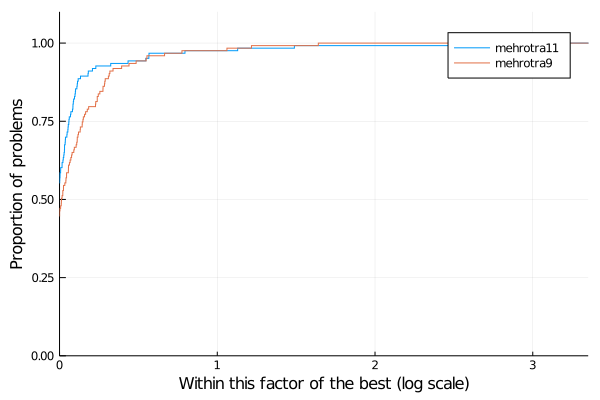

In [26]:
performance_profile(stats, df->df.elapsed_time)

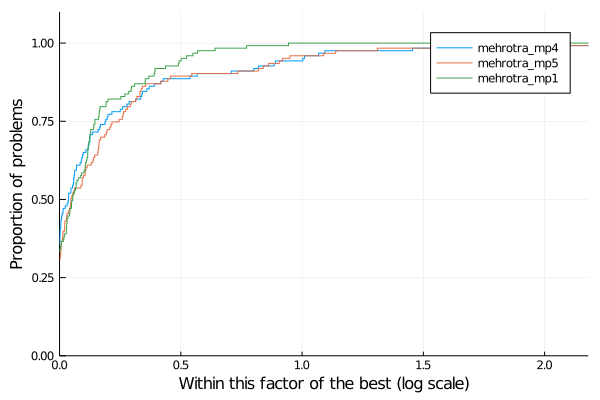

In [7]:
performance_profile(stats2, df->df.elapsed_time)

In [39]:
mehrotra9_iter = copy(mehrotra9)
mehrotra9_iter.iter .*= 4
stats_iter = Dict(:mehrotra9=>mehrotra9_iter, 
                    :mehrotra_mp1=>mehrotra_mp1, 
#                     :mehrotra_mp2=>mehrotra_mp2,
#                     :mehrotra_mp3=>mehrotra_mp3,
#                     :mehrotra_mp4=>mehrotra_mp4,
                    :mehrotra_mp5=>mehrotra_mp5,
                    #:mehrotra_mp6=>mehrotra_mp6
                    :mehrotra_mp7=>mehrotra_mp7
                    )

Dict{Symbol,DataFrame} with 4 entries:
  :mehrotra9    => 123×33 DataFrame. Omitted printing of 26 columns…
  :mehrotra_mp7 => 123×30 DataFrame. Omitted printing of 23 columns…
  :mehrotra_mp5 => 123×30 DataFrame. Omitted printing of 23 columns…
  :mehrotra_mp1 => 123×30 DataFrame. Omitted printing of 23 columns…

In [40]:
println(mehrotra9.iter)
println(mehrotra9_iter.iter)

[5, 5, 12, 12, 3, 3, 12, 12, 16, 86, 7, 11, 47, 13, 36, 32, 66, 15, 6, 10, 9, 7, 79, 24, 8, 3, 9, 7, 9, 8, 12, 10, 6, 9, 12, 3, 99, 14, 15, 5, 13, 7, 3, 3, 4, 6, 9, 7, 23, 129, 38, 69, 72, 85, 37, 24, 38, 27, 35, 36, 83, 76, 8, 9, 10, 31, 9, 8, 10, 10, 10, 12, 11, 8, 26, 11, 9, 18, 16, 15, 17, 31, 23, 17, 20, 17, 18, 13, 30, 38, 14, 11, 17, 16, 23, 27, 29, 13, 17, 8, 12, 11, 16, 13, 16, 41, 23, 14, 13, 14, 14, 14, 16, 16, 13, 150, 61, 67, 6, 7, 4, 12, 7]
[20, 20, 48, 48, 12, 12, 48, 48, 64, 344, 28, 44, 188, 52, 144, 128, 264, 60, 24, 40, 36, 28, 316, 96, 32, 12, 36, 28, 36, 32, 48, 40, 24, 36, 48, 12, 396, 56, 60, 20, 52, 28, 12, 12, 16, 24, 36, 28, 92, 516, 152, 276, 288, 340, 148, 96, 152, 108, 140, 144, 332, 304, 32, 36, 40, 124, 36, 32, 40, 40, 40, 48, 44, 32, 104, 44, 36, 72, 64, 60, 68, 124, 92, 68, 80, 68, 72, 52, 120, 152, 56, 44, 68, 64, 92, 108, 116, 52, 68, 32, 48, 44, 64, 52, 64, 164, 92, 56, 52, 56, 56, 56, 64, 64, 52, 600, 244, 268, 24, 28, 16, 48, 28]


┌ Warning: some measures are zero; shifting all by one
└ @ BenchmarkProfiles C:\Users\Geoffroy Leconte\.julia\packages\BenchmarkProfiles\xB4CX\src\performance_profiles.jl:15


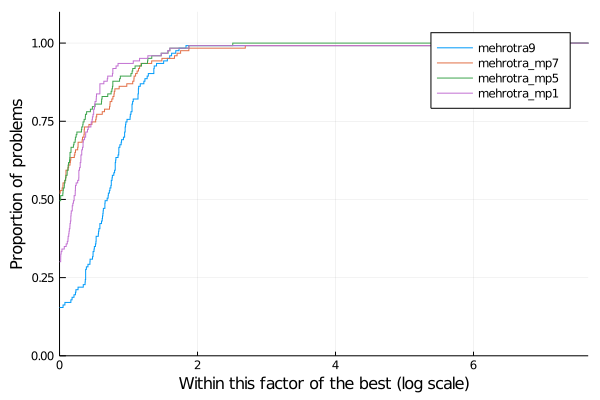

In [41]:
performance_profile(stats_iter, df->df.iter)

In [11]:
#ϵ_pdd = 1e-6
# performance_profile(stats_bis, df->df.elapsed_time)

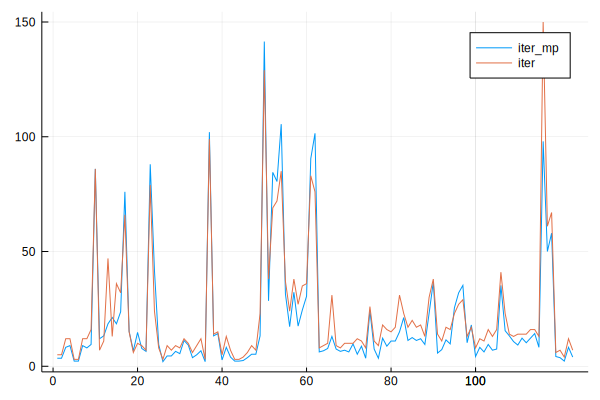

In [20]:
using Plots
plot(mehrotra_mp1.iter_multi_prec, label="iter_mp")
plot!(mehrotra9.iter, label="iter")